In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
%matplotlib inline
np.random.seed(0)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings('ignore')

X = np.genfromtxt('X_train.txt', delimiter=None)
Y = np.genfromtxt('Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)

In [36]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.75)

for i in [10, 50, 250, 500, 1000, 2500]:
    ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5),\
                         n_estimators=i, learning_rate=0.5)
    ada.fit(Xtr,Ytr)
    print(i)
    print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
    print("training err =", 1-ada.score(Xtr,Ytr))
    print("val err =", 1-ada.score(Xva,Yva))
    print()

10
ROC = 0.68560033166
training err = 0.299993333333
val err = 0.30304

50
ROC = 0.712714227785
training err = 0.283206666667
val err = 0.28962

250
ROC = 0.743577376856
training err = 0.25236
val err = 0.27642

500
ROC = 0.754271825253
training err = 0.2293
val err = 0.26884

1000
ROC = 0.760227320214
training err = 0.197153333333
val err = 0.26526

2500
ROC = 0.760923167115
training err = 0.146806666667
val err = 0.26428



In [48]:
for i in [10, 50, 250, 500, 1000, 2500]:
    ada = AdaBoostClassifier(\
        base_estimator = dtree,n_estimators=i, learning_rate=0.5)
    ada.fit(Xtr,Ytr)
    print(i)
    print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
    print("training err =", 1-ada.score(Xtr,Ytr))
    print("val err =", 1-ada.score(Xva,Yva))
    print()

10
ROC = 0.680723344461
training err = 0.302206666667
val err = 0.3032

50
ROC = 0.703066197495
training err = 0.291673333333
val err = 0.29504

250
ROC = 0.729669209694
training err = 0.27294
val err = 0.28366

500
ROC = 0.743654572884
training err = 0.261393333333
val err = 0.27614

1000
ROC = 0.755441302901
training err = 0.250073333333
val err = 0.27068

2500
ROC = 0.771714100292
training err = 0.224973333333
val err = 0.26296



In [75]:
ada = AdaBoostClassifier(dtree,n_estimators=1000, learning_rate=0.3)

ada.fit(X,Y)

print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
print("training err =", 1-ada.score(Xtr,Ytr))
print("val err =", 1-ada.score(Xva,Yva))

ROC = 0.78312776522
training err = 0.25924
val err = 0.25864


In [46]:
dtree = DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_split=512,max_features=0.5,min_samples_leaf=2048)

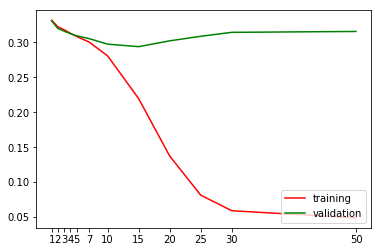

In [79]:
minParents = [1,2,3,4,5,7,10,15,20,25,30,50]
trainErr = np.zeros(len(minParents))
valErr = np.zeros(len(minParents))

for i,k in enumerate(minParents):
    learner = DecisionTreeClassifier(max_depth=k)
    learner.fit(Xtr,Ytr)
    trainErr[i] = 1-learner.score(Xtr,Ytr)
    valErr[i] = 1-learner.score(Xva,Yva)

plt.xticks(minParents)
plt.plot(minParents, trainErr, label = 'training', color = 'r')
plt.plot(minParents, valErr, label = 'validation', color = 'g')
plt.legend(loc = 4)
plt.show()

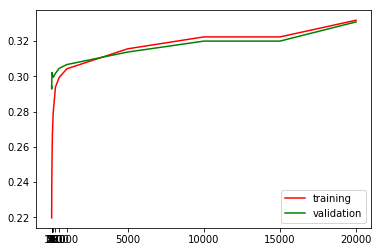

In [81]:
minParents = [1,2,3,4,5,10,25,50,100,250,500,1000,5000,10000,15000,20000]
trainErr = np.zeros(len(minParents))
valErr = np.zeros(len(minParents))

for i,k in enumerate(minParents):
    learner = DecisionTreeClassifier(max_depth=15, min_samples_leaf=k)
    learner.fit(Xtr,Ytr)
    trainErr[i] = 1-learner.score(Xtr,Ytr)
    valErr[i] = 1-learner.score(Xva,Yva)

plt.xticks(minParents)
plt.plot(minParents, trainErr, label = 'training', color = 'r')
plt.plot(minParents, valErr, label = 'validation', color = 'g')
plt.legend(loc = 4)
plt.show()

In [5]:
dtree = learner = DecisionTreeClassifier(max_depth=15, min_samples_leaf=15000,max_features='sqrt')

In [85]:
for i in [1,2,3,4,5,7,10,25,50,100,250,500,1000]:
    ada = AdaBoostClassifier(dtree,n_estimators=i)
    ada.fit(Xtr,Ytr)
    print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
    print("training err =", 1-ada.score(Xtr,Ytr))
    print("val err =", 1-ada.score(Xva,Yva))

ROC = 0.617172166704
training err = 0.3254
val err = 0.32366
ROC = 0.640638110386
training err = 0.31876
val err = 0.3162
ROC = 0.646260044341
training err = 0.3155
val err = 0.31374
ROC = 0.656023593108
training err = 0.313626666667
val err = 0.31326
ROC = 0.644001244961
training err = 0.317873333333
val err = 0.31946
ROC = 0.661156168525
training err = 0.314846666667
val err = 0.31498
ROC = 0.666348866451
training err = 0.311833333333
val err = 0.31088
ROC = 0.682388996678
training err = 0.305606666667
val err = 0.30622
ROC = 0.689652733432
training err = 0.301066666667
val err = 0.30222
ROC = 0.698557293787
training err = 0.2944
val err = 0.29722
ROC = 0.712677883351
training err = 0.286406666667
val err = 0.29434
ROC = 0.726669602402
training err = 0.276213333333
val err = 0.28504
ROC = 0.740687635809
training err = 0.26452
val err = 0.2794


In [86]:
for i in [0.1,0.2,0.3,0.5,0.7,1]:
    ada = AdaBoostClassifier(dtree,n_estimators=1000,learning_rate=i)
    ada.fit(Xtr,Ytr)
    print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
    print("training err =", 1-ada.score(Xtr,Ytr))
    print("val err =", 1-ada.score(Xva,Yva))

ROC = 0.706388450154
training err = 0.293033333333
val err = 0.29562
ROC = 0.716457813339
training err = 0.285733333333
val err = 0.29054
ROC = 0.72136577455
training err = 0.28114
val err = 0.28742
ROC = 0.730818904533
training err = 0.273966666667
val err = 0.2843
ROC = 0.735293028916
training err = 0.270013333333
val err = 0.28098
ROC = 0.739715299563
training err = 0.26344
val err = 0.27888


In [89]:
print("ROC =", roc_auc_score(Yva, ada.predict_proba(Xva)[:,1]) )
print("training err =", 1-ada.score(Xtr,Ytr))
print("val err =", 1-ada.score(Xva,Yva))

ROC = 0.743424663168
training err = 0.263073333333
val err = 0.27862


In [6]:
ada = AdaBoostClassifier(dtree,n_estimators=2000,learning_rate=0.5)
ada.fit(Xtr,Ytr)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=2000, random_state=None)

In [7]:
calibration = CalibratedClassifierCV(cv='prefit',base_estimator=ada,method='sigmoid')
calibration.fit(Xtr,Ytr)
print("training err =", 1-ada.score(Xtr,Ytr))
print("val err =", 1-ada.score(Xva,Yva))

training err = 0.26354
val err = 0.27852


In [94]:
roc_auc_score(Yva, calibration.predict_proba(Xva)[:,1])

0.79432781808457076

In [95]:
np.savetxt('adaboost.txt',np.vstack(calibration.predict_proba(Xte)[:,1]),'%.2f',comments='',delimiter=',')

In [68]:
def to_kaggle(prediction):
    file_name = "Y_submit.txt"
    np.savetxt(file_name,
           np.vstack( (np.arange(len(prediction)) , prediction) ).T,
           '%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

In [78]:
Xte = np.genfromtxt('X_test.txt', delimiter=None)
to_kaggle(calibration.predict_proba(Xte)[:,1])

In [31]:
roc_auc_score(Yva, forest.predict_proba(Xva)[:,1])

0.75386036369808018

In [96]:
to_kaggle(calibration.predict_proba(Xte)[:,1])

In [98]:
from sklearn.model_selection import KFold

In [103]:
kf = KFold(n_splits=15)

probstest = []
probsvalidation = []
trainerr = []
valerr = []
for train,validation in kf.split(X):
    ada.fit(X[train],Y[train])
    calibration = CalibratedClassifierCV(cv='prefit',base_estimator=ada,method='sigmoid')
    calibration.fit(X[train],Y[train])
    trainerr.append(1-calibration.score(X[train],Y[train]))
    valerr.append(1-calibration.score(X[validation],Y[validation]))
    probstest.append(calibration.predict_proba(Xte)[:,1])

In [104]:
avgprobs = np.mean(probstest,axis=0)

In [105]:
print("ROC =", roc_auc_score(Y, avgprobs))

ROC = 0.500160930871
